<a href="https://colab.research.google.com/github/gmm39/CS4410_GMcKenzie/blob/main/Homework6_GMcKenzie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Gage McKenzie\
CS4410\
Homework 6

In [59]:
# 12.6
import nltk
import requests
import imageio
from textblob import TextBlob
from nltk.corpus import stopwords
from operator import itemgetter
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Download required nltk data
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

# Download Hamlet and store in blob
target_url ='http://www.gutenberg.org/files/2265/2265.txt'
response = requests.get(target_url)
data = response.text

blob = TextBlob(data)

# Load in mask image for word cloud
image_file="https://media.cheggcdn.com/media/216/21621ee5-e80f-47f3-9145-513f2229b390/phploeBuh.png"
mask_image = imageio.imread(image_file)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
<ipython-input-59-cca350f9b346>:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  mask_image = imageio.imread(image_file)


In [60]:
# Get top 20 most used non-stopword words in Hamlet
stop_words = stopwords.words('english')

items = [item for item in blob.word_counts.items() if item[0] not in stop_words]
top20 = sorted(items, key=itemgetter(1), reverse=True)[:20]

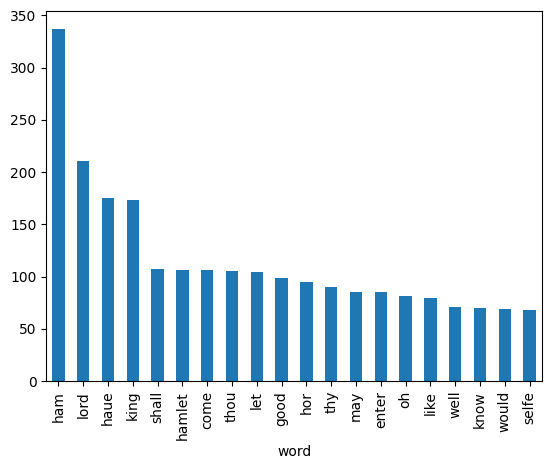

In [61]:
# Create bar graph
axes = pd.DataFrame(top20, columns=['word', 'count']).plot.bar(x='word', y='count', legend=False)

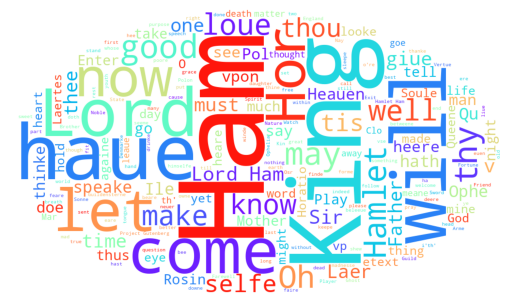

In [63]:
# Create word cloud for Hamlet
wordcloud = WordCloud(colormap='rainbow', mask=mask_image,
                      background_color='white').generate(data)

plt.figure()
plt.axis("off")
plt.imshow(wordcloud)